In [1]:
import numpy as np

In [2]:
arr = [[1,2], [2,3]]

In [3]:
print(arr)

[[1, 2], [2, 3]]


In [4]:
np.array(arr)

array([[1, 2],
       [2, 3]])

In [5]:
torch.Tensor(arr)

NameError: name 'torch' is not defined

In [6]:
import torch

In [7]:
torch.Tensor(arr)

tensor([[1., 2.],
        [2., 3.]])

In [8]:
torch.Tensor((2,2))

tensor([2., 2.])

In [9]:
torch.ones((2,2))

tensor([[1., 1.],
        [1., 1.]])

In [10]:
npArray = np.array(arr)

In [11]:
print(type(npArray))
print(npArray)

<class 'numpy.ndarray'>
[[1 2]
 [2 3]]


In [12]:
torch.Tensor = torch.from_numpy(npArray)

In [13]:
print(torch.Tensor)

tensor([[1, 2],
        [2, 3]])


In [14]:
torch_tensor = torch.from_numpy(npArray)

In [15]:
print(torch_tensor)

tensor([[1, 2],
        [2, 3]])


In [1]:
from torch.autograd import Variable

In [2]:
a = Variable(torch.ones(2,2), requires_grad = True)

NameError: name 'torch' is not defined

In [3]:
import torch
a = Variable(torch.ones(2,2), requires_grad = True)

In [4]:
a

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [5]:
b = Variable(torch.ones(2,2), requires_grad = True)

In [6]:
a+b

tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)

In [7]:
torch.add(a,b)

tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)

In [8]:
a = Variable(torch.Tensor([1,2]), requires_grad=True)
a

tensor([1., 2.], requires_grad=True)

In [9]:
y = 5 * (a +1) ** 2 

In [10]:
y

tensor([20., 45.], grad_fn=<MulBackward0>)

In [11]:
o = 1/2 * torch.sum(y)
o

tensor(32.5000, grad_fn=<MulBackward0>)

In [14]:
o.backward()
x.grad()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [15]:
o.backward()
x.grad

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [16]:
o = 1/2 * torch.sum(y)
o

tensor(32.5000, grad_fn=<MulBackward0>)

In [17]:
o.backward()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [18]:
o.backward(retain_graph=True)

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [19]:
o.backward(torch.FloatTensor([1.0, 1.0]))

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [20]:
o.backward(torch.FloatTensor([1.0, 1.0]), retain_graph = True)

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [21]:
a = torch.tensor([1,2,3.], requires_grad = True)
out = a.sigmoid()
out.sum().backward()
a.grad # This will output following

tensor([0.1966, 0.1050, 0.0452])

## Linear Regression

In [49]:
x_values = [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [50]:
import numpy as np

In [51]:
x_train = np.array(x_values, dtype = np.float32)

In [52]:
x_train

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
      dtype=float32)

In [53]:
x_train.shape

(11,)

In [54]:
x_train = x_train.reshape(-1,1)
x_train.shape

(11, 1)

In [55]:
y_values = [2*i+1 for i in range(11)]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [56]:
y_train = np.array(y_values, dtype = np.float32)
y_train.shape

(11,)

In [57]:
y_train = y_train.reshape(-1,1)
y_train.shape

(11, 1)

In [58]:
# building Model

# step 1:
   # load library

import torch
from torch.autograd import Variable
import torch.nn as nn

In [59]:
# step 2 : create model class

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out
        

In [60]:
# step 3: initiate model class

input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [61]:
# step 4: initiate Loss class

criterion = nn.MSELoss()

In [62]:
# step 5: set learning rate and create optimizer

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [64]:
# step 6: Train model

epochs = 100

for epoch in range(epochs):
    epoch += 1
    
    # convert numpy arrays into torch variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # clear gradients w.r.t parameters
    
    optimizer.zero_grad()
    
    # forward to get outputs
    
    outputs = model(inputs)
    
    # calculate loss
    
    loss = criterion(outputs, labels)
    
    # getting gradient w.r.t parameters
    
    loss.backward()
    
    # updating parameters
    
    optimizer.step()
    
    print("epoch {}, loss {}".format(epoch, loss.data))

epoch 1, loss 14.305438041687012
epoch 2, loss 1.3376792669296265
epoch 3, loss 0.2780323624610901
epoch 4, loss 0.18971408903598785
epoch 5, loss 0.18064500391483307
epoch 6, loss 0.17806075513362885
epoch 7, loss 0.1760263741016388
epoch 8, loss 0.17405690252780914
epoch 9, loss 0.17211274802684784
epoch 10, loss 0.1701909750699997
epoch 11, loss 0.1682904213666916
epoch 12, loss 0.1664111316204071
epoch 13, loss 0.16455286741256714
epoch 14, loss 0.16271549463272095
epoch 15, loss 0.1608983427286148
epoch 16, loss 0.1591017097234726
epoch 17, loss 0.15732502937316895
epoch 18, loss 0.15556807816028595
epoch 19, loss 0.1538309007883072
epoch 20, loss 0.15211305022239685
epoch 21, loss 0.1504145711660385
epoch 22, loss 0.14873477816581726
epoch 23, loss 0.1470739096403122
epoch 24, loss 0.14543156325817108
epoch 25, loss 0.14380741119384766
epoch 26, loss 0.14220167696475983
epoch 27, loss 0.1406138688325882
epoch 28, loss 0.13904358446598053
epoch 29, loss 0.13749106228351593
epoch 3

In [67]:
# compare data

predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.5370177],
       [ 2.6036916],
       [ 4.6703653],
       [ 6.737039 ],
       [ 8.803713 ],
       [10.870386 ],
       [12.93706  ],
       [15.003735 ],
       [17.070408 ],
       [19.137081 ],
       [21.203754 ]], dtype=float32)

In [68]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

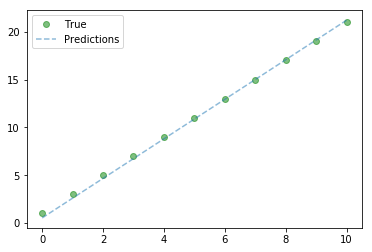

In [72]:
# plot graph
import matplotlib.pyplot as plt

plt.clf() # clear the plot screen

predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

plt.plot(x_train, y_train, 'go', label = 'True', alpha = 0.5)

plt.plot(x_train, predicted, '--', label = 'Predictions', alpha = 0.5)

plt.legend(loc = 'best')
plt.show()